<Axes: >

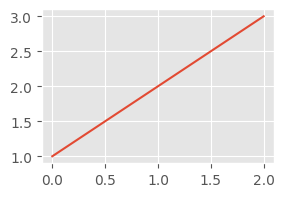

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))


# 데이터 불러오기

In [37]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('../data/advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 변수 선택
* 3가지 독립변수 모두 선택

In [38]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [39]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 파이프라인 구성 
* 데이터 처리 과정을 순차적으로 연결하여 자동화하는 도구

In [40]:
# --------------------------------------------
# 파이프라인 정의
# --------------------------------------------
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

pipe = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge(alpha=10)
)


## 훈련

In [41]:
# --------------------------------------------
# 훈련
# --------------------------------------------
pipe.fit(X_train, y_train)


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])

## 모델 평가

In [42]:

# --------------------------------------------
# 예측
# --------------------------------------------
pred = pipe.predict(X_test)

# --------------------------------------------
# 모델 성능 평가
# --------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"R2: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

# --------------------------------------------
# 과적합 확인
# --------------------------------------------
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

R2: 0.92
RMSE: 1.45
MAE: 1.07
MSE: 2.10
0.9025222263290174
0.9227343615616703


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [43]:
import joblib

joblib.dump(pipe, '../models/ad_pipe.pkl')

['../models/ad_pipe.pkl']

In [44]:
# ---------------------
# 파이프라인 불러오기
# ---------------------
pipe = joblib.load("../models/ad_pipe.pkl")

# ------------------------------------
# 예측
# ------------------------------------
new_X = [[175, 15, 2]]

pred = pipe.predict(new_X)

print(pred)

[15.39046241]


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
